In [1]:
#import librarys
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('mode.chained_assignment',  None)
pd.set_option('display.max_columns', None)

In [2]:
#Read in the data
profile = pd.read_csv('profile.csv', index_col=0)
portfolio = pd.read_csv('portfolio.csv', index_col=0)
transcript = pd.read_csv('transcript.csv', index_col=0)

In [6]:
#Inspect the profile data
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
#Sum the null values
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

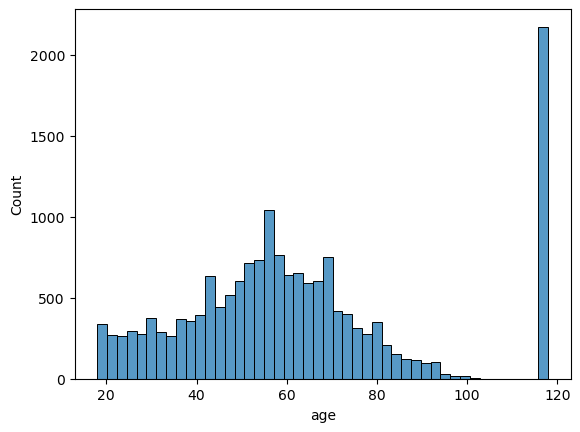

In [5]:
#Find out the age distribution
#There are some false data in the age column.
sns.histplot(data=profile, x='age')
plt.show()

In [7]:
#The suspicious age is 118.
#And the people who have suspicious age also have the null value of 'gender' and 'income'.
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [8]:
#Remove the false values.
profile = profile.dropna()
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


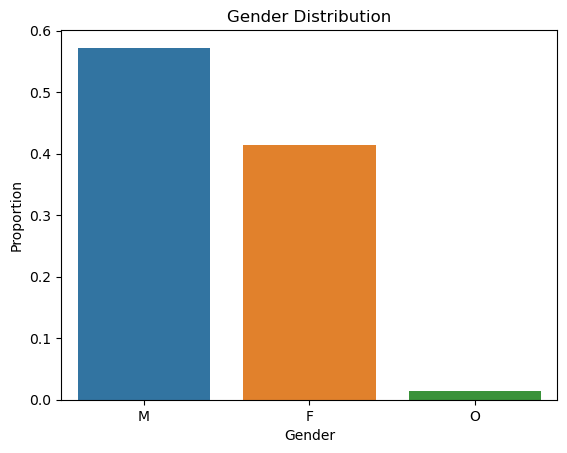

In [9]:
#Plot the gender distribution
sns.barplot(x=profile['gender'].value_counts().index, y=profile['gender'].value_counts(normalize=True))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()
#The gender distirbution is like below, the customers consists of about 57% of Male, 40% of Female and 3% of the 3rd of Other

In [10]:
profile['log_income'] = profile['income'].apply(np.log10)

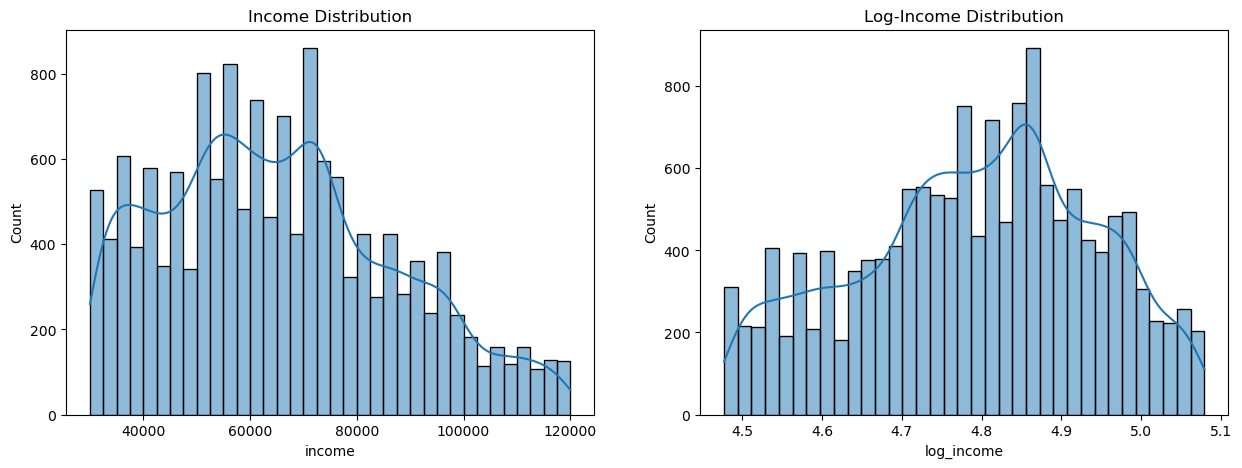

In [11]:
#Plot the incomes and the log of incomes.
#The Income distribution is left skewed. Menaning that in the dataset there is more people who has lower salary than the average of salary.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['income', 'log_income']):
    sns.histplot(ax=axes[i], data=profile, x=col, kde=True)

axes[0].set_title('Income Distribution')
axes[1].set_title('Log-Income Distribution')
plt.show()

In [12]:
#Print the average and median of salary.
print('Average income is: {}'.format(round(profile['income'].mean(), 3)))
print('Median income is: {}'.format(profile['income'].median()))

Average income is: 65404.992
Median income is: 64000.0


In [13]:
#Check the datatypes of each column
profile.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
log_income          float64
dtype: object

In [14]:
#Change the datatype for column became_member_on
profile.loc[:, 'became_member_on'] = pd.to_datetime(arg=profile['became_member_on'], format='%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income,log_income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,4.845098
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,4.724276
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,4.707570


In [16]:
#Create year and month column from became_member_on
profile['year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile['month'] = pd.DatetimeIndex(profile['became_member_on']).month

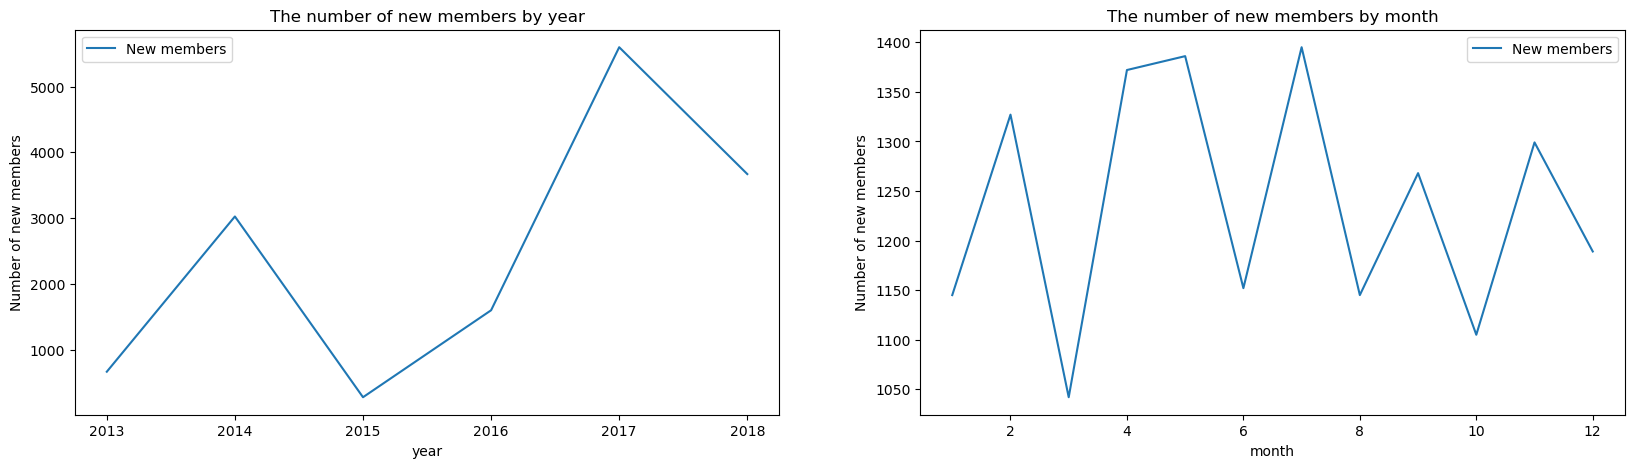

In [17]:
#Create a line graph about historic information.
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

for i, col in enumerate(['year', 'month']):
    sns.lineplot(ax=axes[i], x=profile[col].unique(), y=profile[col].value_counts(), label='New members')
    axes[i].set_title(f'The number of new members by {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Number of new members')
plt.show()
#Based on the bwloe graphs 2016 was the year where most people became a Starbucks member.
#Regarding the months we can see that each high joining month is followed by a low joining month.

In [19]:
#Join the profile table to the transcript table based on id and person
profile_transcript = profile.merge(right=transcript, how='left', left_on='id', right_on='person')
profile_transcript.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,value,time
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528


In [31]:
#There is 4 outcomes of the event
profile_transcript['event'].value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

In [21]:
#The value column for transaction is different from the offer, therefore further preprocessing is necessary.
transaction = profile_transcript.loc[profile_transcript['event'] == 'transaction']
offer = profile_transcript.loc[profile_transcript['event'] != 'transaction']

In [32]:
#Preprocess for the amount column
import re

pattern = re.compile('[\d]+.[\d]+')
transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
transaction.rename(columns={'value': 'amount'}, inplace=True)
transaction = transaction.astype(dtype={'amount': 'float'})
transaction.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528
8,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132
10,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144


In [34]:
#Get the average amount for each person(id)
mean_amount_by_id = pd.pivot_table(data=transaction, values='amount', index='id', aggfunc='mean').reset_index()
mean_amount_by_id

,id,amount
0,0009655768c64bdeb2e877511632db8f,15.950000
1,0011e0d4e6b944f998e987f904e8c1e5,15.892000
2,0020c2b971eb4e9188eac86d93036a77,24.607500
3,0020ccbbb6d84e358d3414a3ff76cffd,12.837500
4,003d66b6608740288d6cc97a6903f4f0,2.685556
...,...,...
14487,fff3ba4757bd42088c044ca26d73817a,52.816364
14488,fff7576017104bcc8677a8d63322b5e1,4.990000
14489,fff8957ea8b240a6b5e634b6ee8eafcf,2.430000
14490,fffad4f4828548d1b5583907f2e9906b,7.402500


In [35]:
#Join the profile data to the Pivot created in the previous step
mean_amount_by_id = mean_amount_by_id.merge(right=profile, how='left', on='id')
mean_amount_by_id.head()

,id,amount,gender,age,became_member_on,income,log_income,year,month
0,0009655768c64bdeb2e877511632db8f,15.950000,M,33,2017-04-21,72000.0,4.857332,2017,4
1,0011e0d4e6b944f998e987f904e8c1e5,15.892000,O,40,2018-01-09,57000.0,4.755875,2018,1
2,0020c2b971eb4e9188eac86d93036a77,24.607500,F,59,2016-03-04,90000.0,4.954243,2016,3
3,0020ccbbb6d84e358d3414a3ff76cffd,12.837500,F,24,2016-11-11,60000.0,4.778151,2016,11
4,003d66b6608740288d6cc97a6903f4f0,2.685556,F,26,2017-06-21,73000.0,4.863323,2017,6


In [36]:
#Based on the age column we can create categorical variables.
def to_generation(age):
    if age < 20:
        return 'teenager'
    elif age < 40:
        return 'youth'
    elif age < 60:
        return 'middle'
    elif age < 80:
        return 'older'
    else:
        return 'senior'

mean_amount_by_id['generation'] = mean_amount_by_id['age'].apply(to_generation)
mean_amount_by_id.head()

,id,amount,gender,age,became_member_on,income,log_income,year,month,generation
0,0009655768c64bdeb2e877511632db8f,15.950000,M,33,2017-04-21,72000.0,4.857332,2017,4,youth
1,0011e0d4e6b944f998e987f904e8c1e5,15.892000,O,40,2018-01-09,57000.0,4.755875,2018,1,middle
2,0020c2b971eb4e9188eac86d93036a77,24.607500,F,59,2016-03-04,90000.0,4.954243,2016,3,middle
3,0020ccbbb6d84e358d3414a3ff76cffd,12.837500,F,24,2016-11-11,60000.0,4.778151,2016,11,youth
4,003d66b6608740288d6cc97a6903f4f0,2.685556,F,26,2017-06-21,73000.0,4.863323,2017,6,youth


C:\Users\bende\AppData\Local\Temp\ipykernel_18680\1259315080.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gby_gender = mean_amount_by_id.groupby(by='gender').mean()['amount']


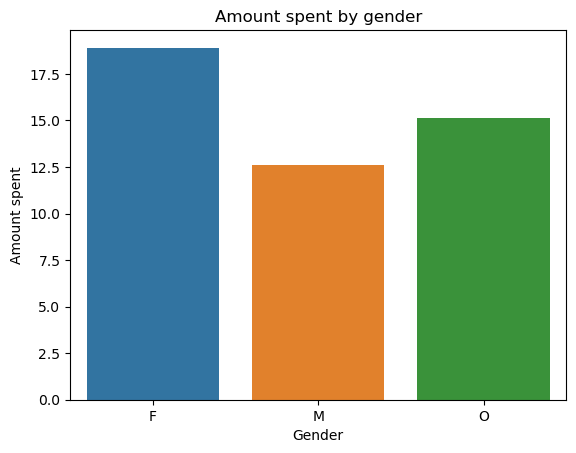

In [38]:
#Plot the amount spent by gender
gby_gender = mean_amount_by_id.groupby(by='gender').mean()['amount']

sns.barplot(x=gby_gender.index, y=gby_gender)
plt.title('Amount spent by gender')
plt.xlabel('Gender')
plt.ylabel('Amount spent')
plt.show()

C:\Users\bende\AppData\Local\Temp\ipykernel_18680\1517792050.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gby_generation = mean_amount_by_id.groupby(by='generation').mean()['amount']


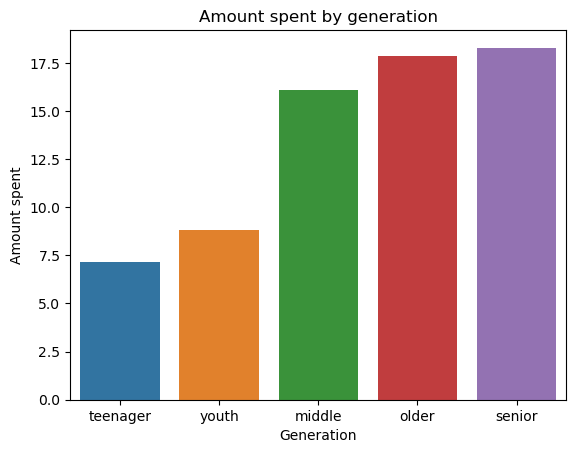

In [41]:
#Plot the amount spent by generation
gby_generation = mean_amount_by_id.groupby(by='generation').mean()['amount']

sns.barplot(x=gby_generation.index, y=gby_generation, order=['teenager', 'youth', 'middle', 'older', 'senior'])
plt.title('Amount spent by generation')
plt.xlabel('Generation')
plt.ylabel('Amount spent')
plt.show()

In [42]:
#Add the offerid column
offer = profile_transcript.loc[profile_transcript['event'] == 'offer completed']

ID_LENGTH = 32

offer['offer_id'] = offer['value'].str.slice(start=14, stop=(14 + ID_LENGTH))
offer = offer.drop(labels='value', axis=1)
offer.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,time,offer_id
5,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,528,9b98b8c7a33c4b65b9aebfe6a799e6d9
9,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9
20,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,ae264e3637204a6fb9bb56bc8210ddfd
21,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,f19421c1d4aa40978ebb69ca19b0e20d
34,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,4.845098,2018,4,e2127556f4f64592b11af22de27a7932,offer completed,522,9b98b8c7a33c4b65b9aebfe6a799e6d9


In [44]:
#Create the cleaned dataset.
cleaned_transcript = pd.concat(objs=[transaction, offer]).sort_index()
cleaned_transcript.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528,NaN
5,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,NaN,528,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,NaN


In [50]:
#Add the generation column
cleaned_transcript['generation'] = cleaned_transcript['age'].apply(to_generation)
cleaned_transcript

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id,generation
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN,middle
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN,middle
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528,NaN,middle
5,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,NaN,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle
8,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,NaN,older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272753,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,transaction,21.53,96,NaN,older
272756,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,transaction,30.57,480,NaN,older
272757,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,offer completed,NaN,480,f19421c1d4aa40978ebb69ca19b0e20d,older
272758,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,transaction,19.47,486,NaN,older


In [52]:
#Join the portfolio table to the cleaned dataset
history = cleaned_transcript.merge(right=portfolio, how='left', left_on='offer_id', right_on='id')
history

,gender,age,id_x,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type,id_y
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN,middle,NaN,NaN,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN,middle,NaN,NaN,NaN,NaN,NaN,NaN
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528,NaN,middle,NaN,NaN,NaN,NaN,NaN,NaN
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,NaN,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,NaN,older,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156396,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,transaction,21.53,96,NaN,older,NaN,NaN,NaN,NaN,NaN,NaN
156397,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,transaction,30.57,480,NaN,older,NaN,NaN,NaN,NaN,NaN,NaN
156398,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,offer completed,NaN,480,f19421c1d4aa40978ebb69ca19b0e20d,older,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d
156399,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.0,4.913814,2017,7,e4052622e5ba45a8b96b59aba68cf068,transaction,19.47,486,NaN,older,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Drop id_y column, ranme id_x to id
history = history.drop(labels=['id_y'], axis=1)
history.rename(columns={'id_x': 'id'}, inplace=True)
history.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN,middle,NaN,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN,middle,NaN,NaN,NaN,NaN,NaN
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528,NaN,middle,NaN,NaN,NaN,NaN,NaN
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,23.22,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
4,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,NaN,older,NaN,NaN,NaN,NaN,NaN


In [57]:
#Fill the missing values, and drop duplicates based on id and time column
history['amount'] = history['amount'].fillna(method='ffill')
history = history.drop_duplicates(subset=['id', 'time'], keep='last')
history.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN,middle,NaN,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN,middle,NaN,NaN,NaN,NaN,NaN
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,23.22,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
5,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer completed,19.89,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,older,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
6,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,NaN,older,NaN,NaN,NaN,NaN,NaN


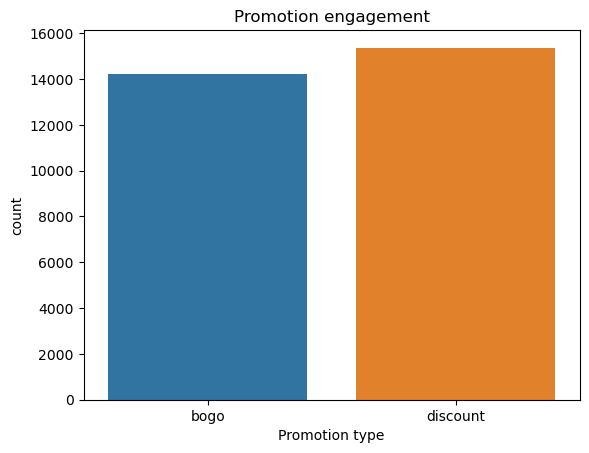

In [58]:
#When offer is comepleted we have more discount promotion type
offer_completed = history.loc[history['event'] == 'offer completed']

sns.countplot(data=offer_completed, x='offer_type')
plt.title('Promotion engagement')
plt.xlabel('Promotion type')
plt.show()

C:\Users\bende\AppData\Local\Temp\ipykernel_18680\3975668179.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gby_offer_type = offer_completed.groupby(by='offer_type').mean()['amount']


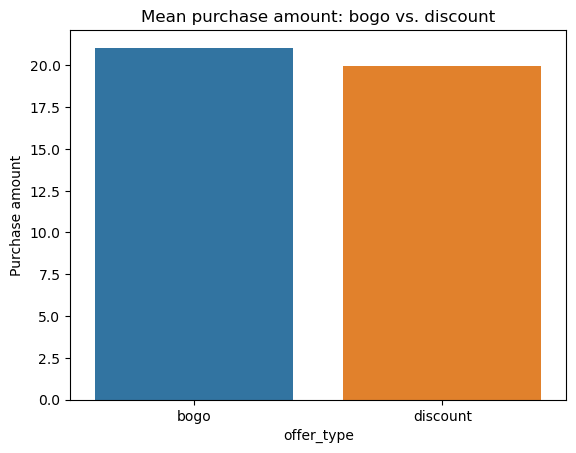

In [60]:
#The bogo promotion type has higher average purchase amount than the discount one.
gby_offer_type = offer_completed.groupby(by='offer_type').mean()['amount']

sns.barplot(x=gby_offer_type.index, y=gby_offer_type)
plt.title('Mean purchase amount: bogo vs. discount')
plt.ylabel('Purchase amount')
plt.show()

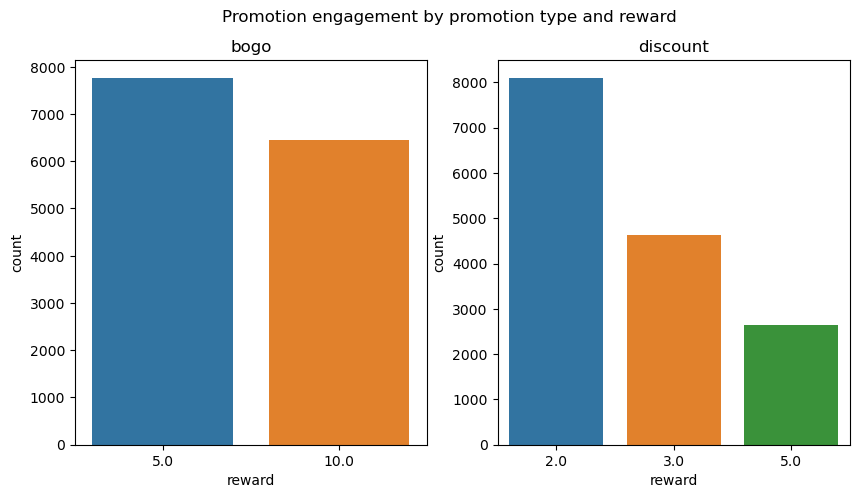

In [61]:
# Map the two promotion type based on reward.
#The lower the reward the less engagement we are having.
bogo = offer_completed.loc[offer_completed['offer_type'] == 'bogo']
discount = offer_completed.loc[offer_completed['offer_type'] == 'discount']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(ax=axes[0], data=bogo, x='reward')
sns.countplot(ax=axes[1], data=discount, x='reward')
plt.suptitle('Promotion engagement by promotion type and reward')
axes[0].set_title('bogo')
axes[1].set_title('discount')
plt.show()